# Pulling Data from database

#### This section includes pulling mega data from SQL database by psycopg2
[Take Me to Psycopg2.9.3 Documentation](https://www.psycopg.org/docs/)

In [1]:
import psycopg2
from getpass import getpass

In [31]:
# Get password 
db_password = getpass("Enter database password.")

# Connect to an existing database
conn = psycopg2.connect(
    host = "database-1.cxmneo38riye.us-east-2.rds.amazonaws.com",
    database = "postgres",
    user = "postgres",
    password = db_password,    # Please reach out to admin if passcode is needed.
    port = "5432"
)

# Build cursor
cur = conn.cursor()

# Execute query
cur.execute("SELECT * FROM covid_stocks_with_covid_data")

rows = cur.fetchall()

# Create lists of datas
vac_comp_covid = []

for r in rows:
    vac_comp_covid.append(r)
    
cur.close()

Enter database password. ········


In [32]:
# Build cursor
cur = conn.cursor()

# Execute query
cur.execute("SELECT * FROM spx_sector_covid_data")

rows = cur.fetchall()

# Create lists of datas
spx_covid = []

for r in rows:
    spx_covid.append(r)
    
cur.close()

In [33]:
# Close cursor & connection

conn.close()

In [34]:
# Transforming list of lists into dataframe.
import pandas as pd

# Column names 
col_names1 = ["PandemicDate","DailyNewCases","DailyNewDeaths","StockTicker","OpenPrice","Highest","Lowest","Closing","TradingVolume","VolumnWeightedAVGPrice","Transactions"]
col_names2 = ["date","spx_close","hlth_close","cons_close","cond_close","enrs_close","finl_close","indu_close","inft_close","matr_close","rlst_close","tels_close","util_close","daily_new_cases","daily_new_deaths"]

covid_stocks_with_covid_data = pd.DataFrame(vac_comp_covid, columns = col_names1)

spx_sector_covid_data = pd.DataFrame(spx_covid, columns = col_names2)


In [37]:
# Preview
covid_stocks_with_covid_data

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
0,2020-03-11,307.0,8.0,PFE,30.48,32.000,30.00,30.02,60585686.0,30.6586,307447.0
1,2020-03-12,1174.0,4.0,PFE,31.27,32.880,30.23,32.71,58156515.0,31.4335,313654.0
2,2020-03-15,1046.0,17.0,PFE,29.94,32.285,29.65,30.18,48333517.0,30.9841,270185.0
3,2020-03-16,1336.0,21.0,PFE,31.64,32.650,30.59,32.16,52139745.0,31.6114,317412.0
4,2020-03-17,2442.0,25.0,PFE,30.77,32.610,30.31,32.36,42228311.0,31.6159,249462.0
...,...,...,...,...,...,...,...,...,...,...,...
7063,None,236702.0,2781.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7064,None,25670.0,965.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7065,None,67776.0,1165.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7066,None,35725.0,1948.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Preview
spx_sector_covid_data

,date,spx_close,hlth_close,cons_close,cond_close,enrs_close,finl_close,indu_close,inft_close,matr_close,rlst_close,tels_close,util_close,daily_new_cases,daily_new_deaths
0,2020-03-12,2480.64,985.40,537.00,766.6017,221.69,336.66,490.22,1319.10,271.97,200.75,144.33,275.20,1174.0,4.0
1,2020-03-13,2711.02,1053.92,582.16,813.2361,241.29,381.20,528.60,1476.91,290.78,218.08,157.61,290.48,749.0,7.0
2,2020-03-16,2386.13,948.61,541.45,714.9846,208.41,327.87,468.10,1271.40,257.52,181.99,141.15,256.95,1336.0,21.0
3,2020-03-17,2529.19,1007.95,586.90,743.7777,209.92,346.78,487.75,1357.53,274.66,194.62,146.78,290.64,2442.0,25.0
4,2020-03-18,2398.1,973.71,568.91,707.1269,179.94,316.10,452.86,1295.22,257.74,180.10,142.65,277.16,3738.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2021-12-28,4786.35,1637.97,798.18,1619.3360,427.25,653.01,893.07,3089.10,566.63,320.97,271.28,359.45,342971.0,2060.0
454,2021-12-29,4793.06,1647.76,801.54,1621.5600,424.55,652.58,894.53,3091.36,569.06,323.03,270.45,361.29,483137.0,1991.0
455,2021-12-30,4778.73,1650.43,798.96,1615.4200,421.68,650.89,891.03,3070.42,566.98,324.18,270.76,362.53,599380.0,1672.0
456,2021-12-31,4766.18,1643.92,804.60,1610.7560,422.74,650.04,894.96,3055.45,569.63,324.75,267.48,363.71,619997.0,1009.0


In [38]:
# Transforming PandemicDate to datetime format.
print(covid_stocks_with_covid_data.dtypes)
print(spx_sector_covid_data.dtypes)
covid_stocks_with_covid_data["PandemicDate"] = pd.to_datetime(covid_stocks_with_covid_data["PandemicDate"])
spx_sector_covid_data["date"] = pd.to_datetime(spx_sector_covid_data["date"])

# Re-check the format of datetime
print(covid_stocks_with_covid_data.dtypes)
print(spx_sector_covid_data.dtypes)

PandemicDate               object
DailyNewCases             float64
DailyNewDeaths            float64
StockTicker                object
OpenPrice                 float64
Highest                   float64
Lowest                    float64
Closing                   float64
TradingVolume             float64
VolumnWeightedAVGPrice    float64
Transactions              float64
dtype: object
date                 object
spx_close            object
hlth_close          float64
cons_close          float64
cond_close          float64
enrs_close          float64
finl_close          float64
indu_close          float64
inft_close          float64
matr_close          float64
rlst_close          float64
tels_close          float64
util_close          float64
daily_new_cases     float64
daily_new_deaths    float64
dtype: object
PandemicDate              datetime64[ns]
DailyNewCases                    float64
DailyNewDeaths                   float64
StockTicker                       object
OpenPrice     

In [49]:
# Testing tesing testing 
covid_stocks_with_covid_data[covid_stocks_with_covid_data["PandemicDate"] == "2020-03-11"].head(1)

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
0,2020-03-11,307.0,8.0,PFE,30.48,32.0,30.0,30.02,60585686.0,30.6586,307447.0


In [65]:
# testing tesing testing
covid_stocks_with_covid_data[covid_stocks_with_covid_data["PandemicDate"] >= "2021-03-21"]

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
225,2021-10-03,72633.0,1024.0,PFE,42.930,43.345,42.21,42.42,28906548.0,42.5638,162605.0
226,2021-10-04,75180.0,995.0,PFE,42.530,42.790,42.28,42.32,19342555.0,42.4740,106530.0
227,2021-10-05,105322.0,2123.0,PFE,42.060,42.200,41.69,42.02,30430844.0,41.9627,133462.0
228,2021-10-06,110138.0,2387.0,PFE,42.520,42.960,42.21,42.74,19778304.0,42.7356,117139.0
229,2021-10-07,112665.0,2096.0,PFE,42.730,42.905,42.34,42.45,13066558.0,42.5078,83354.0
...,...,...,...,...,...,...,...,...,...,...,...
6907,2021-12-26,217974.0,381.0,NVAX,168.555,169.390,155.11,157.80,8934203.0,160.0433,159765.0
6908,2021-12-27,253843.0,920.0,NVAX,153.160,175.990,153.10,155.84,12384643.0,162.9178,185409.0
6909,2021-12-28,342971.0,2060.0,NVAX,153.280,155.280,144.56,153.25,7511780.0,150.6786,111874.0
6910,2021-12-29,483137.0,1991.0,NVAX,152.780,159.000,148.86,154.83,5093321.0,154.1007,82034.0


In [69]:
# Testing testing testing
covid_stocks_with_covid_data[covid_stocks_with_covid_data["PandemicDate"] >= "2021-06-21"]

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
225,2021-10-03,72633.0,1024.0,PFE,42.930,43.345,42.21,42.42,28906548.0,42.5638,162605.0
226,2021-10-04,75180.0,995.0,PFE,42.530,42.790,42.28,42.32,19342555.0,42.4740,106530.0
227,2021-10-05,105322.0,2123.0,PFE,42.060,42.200,41.69,42.02,30430844.0,41.9627,133462.0
228,2021-10-06,110138.0,2387.0,PFE,42.520,42.960,42.21,42.74,19778304.0,42.7356,117139.0
229,2021-10-07,112665.0,2096.0,PFE,42.730,42.905,42.34,42.45,13066558.0,42.5078,83354.0
...,...,...,...,...,...,...,...,...,...,...,...
6907,2021-12-26,217974.0,381.0,NVAX,168.555,169.390,155.11,157.80,8934203.0,160.0433,159765.0
6908,2021-12-27,253843.0,920.0,NVAX,153.160,175.990,153.10,155.84,12384643.0,162.9178,185409.0
6909,2021-12-28,342971.0,2060.0,NVAX,153.280,155.280,144.56,153.25,7511780.0,150.6786,111874.0
6910,2021-12-29,483137.0,1991.0,NVAX,152.780,159.000,148.86,154.83,5093321.0,154.1007,82034.0


In [29]:
# Dropping null values
covid_stocks_with_covid_data.isnull().sum()
covid_stocks_with_covid_data.dropna(inplace = True)

spx_sector_covid_data.isnull().sum()
spx_sector_covid_data.dropna(inplace = True)

# Filter out unnecessary (out-of-range) data
start = "2020-03-11"
end = "2021-03-10"
covid_stocks_with_covid_data = covid_stocks_with_covid_data[(covid_stocks_with_covid_data["PandemicDate"] >= start) & (covid_stocks_with_covid_data["PandemicDate"] < end)]
spx_sector_covid_data = spx_sector_covid_data[(spx_sector_covid_data["date"] >= start) & (spx_sector_covid_data["date"] < end)]

In [10]:
# covid_stocks_with_covid_data.pivot(index=['PandemicDate'], columns = ['StockTicker'], values = ['Closing'])
# Error (Index contains duplicate entries, cannot reshape)

In [11]:
# Export for testing
covid_stocks_with_covid_data.to_csv("test/test.csv")

In [12]:
# There are duplicates in our dataset that needs to be cleaned. 
covid_stocks_with_covid_data[covid_stocks_with_covid_data.duplicated()]

,PandemicDate,DailyNewCases,DailyNewDeaths,StockTicker,OpenPrice,Highest,Lowest,Closing,TradingVolume,VolumnWeightedAVGPrice,Transactions
1728,2020-03-11,307.0,8.0,PFE,30.48,32.0000,30.00,30.02,60585686.0,30.6586,307447.0
1729,2020-03-12,1174.0,4.0,PFE,31.27,32.8800,30.23,32.71,58156515.0,31.4335,313654.0
1730,2020-03-15,1046.0,17.0,PFE,29.94,32.2850,29.65,30.18,48333517.0,30.9841,270185.0
1731,2020-03-16,1336.0,21.0,PFE,31.64,32.6500,30.59,32.16,52139745.0,31.6114,317412.0
1732,2020-03-17,2442.0,25.0,PFE,30.77,32.6100,30.31,32.36,42228311.0,31.6159,249462.0
...,...,...,...,...,...,...,...,...,...,...,...
6844,2021-01-25,148458.0,2164.0,NVAX,131.61,132.4700,126.68,127.16,2252977.0,129.2286,28941.0
6845,2021-01-26,156148.0,3952.0,NVAX,124.00,136.3399,121.74,131.18,3990068.0,129.6327,52307.0
6846,2021-01-27,158567.0,4407.0,NVAX,131.00,140.4199,129.57,134.01,9146552.0,144.3835,110644.0
6847,2021-01-28,167718.0,4047.0,NVAX,191.05,235.5000,172.00,220.94,36661372.0,212.1334,489160.0


In [13]:
# Dropping duplicates
covid_stocks_with_covid_data = covid_stocks_with_covid_data.drop_duplicates()

In [14]:
# Pivot
clean_covid_stocks_with_covid_data = covid_stocks_with_covid_data.pivot(index=['PandemicDate'], columns = ['StockTicker'], values = ['Closing']).reset_index()
clean_covid_stocks_with_covid_data.head()

PandemicDate Closing                                    
StockTicker                  AZN   BNTX     JNJ   MRNA   NVAX    PFE
0             2020-03-11   40.76  28.55  125.41  22.30   9.29  30.02
1             2020-03-12   42.28  30.93  134.29  21.30   8.41  32.71
2             2020-03-15   37.79  40.00  127.13  26.49   6.91  30.18
3             2020-03-16   40.93  66.60  136.59  28.18   9.50  32.16
4             2020-03-17   39.36  92.00  134.96  31.58  10.65  32.36

# Graph of closing prices for vaccination companies

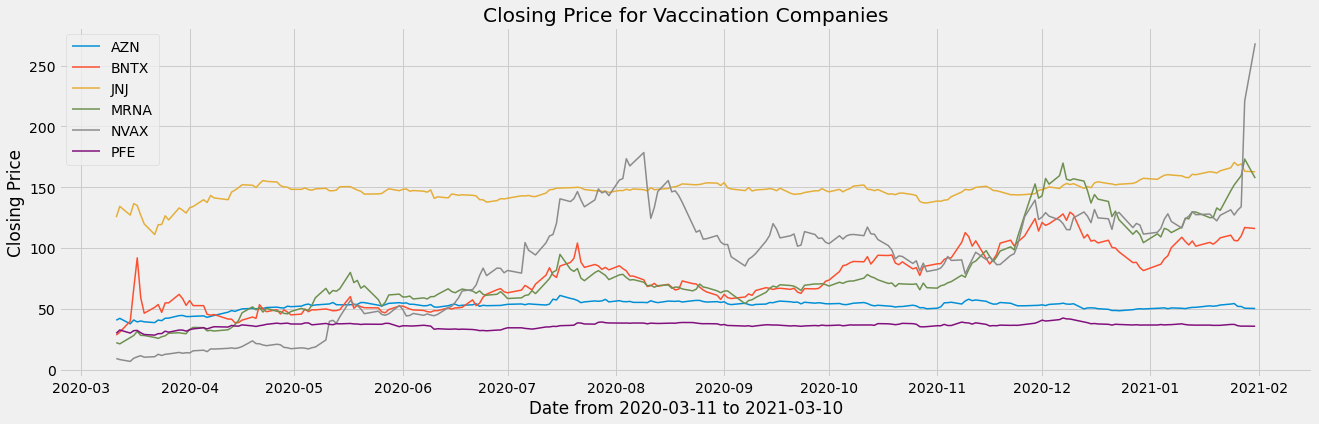

In [15]:
# Import plt and style from matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Set style
style.use('fivethirtyeight')

plt.rcParams["figure.figsize"] = (20,6)
fig, ax = plt.subplots()
ax.plot(clean_covid_stocks_with_covid_data["PandemicDate"], clean_covid_stocks_with_covid_data.Closing, linewidth = 1.5)
ax.legend(clean_covid_stocks_with_covid_data.Closing.columns)
plt.title("Closing Price for Vaccination Companies")
plt.xlabel("Date from 2020-03-11 to 2021-03-10")
plt.ylabel("Closing Price")
plt.show()

# Graph of SPX sector across time period

In [16]:
spx_sector_covid_data

,date,spx_close,hlth_close,cons_close,cond_close,enrs_close,finl_close,indu_close,inft_close,matr_close,rlst_close,tels_close,util_close,daily_new_cases,daily_new_deaths
0,2020-03-12,2480.64,985.40,537.00,766.6017,221.69,336.66,490.22,1319.10,271.97,200.75,144.33,275.20,1174.0,4.0
1,2020-03-13,2711.02,1053.92,582.16,813.2361,241.29,381.20,528.60,1476.91,290.78,218.08,157.61,290.48,749.0,7.0
2,2020-03-16,2386.13,948.61,541.45,714.9846,208.41,327.87,468.10,1271.40,257.52,181.99,141.15,256.95,1336.0,21.0
3,2020-03-17,2529.19,1007.95,586.90,743.7777,209.92,346.78,487.75,1357.53,274.66,194.62,146.78,290.64,2442.0,25.0
4,2020-03-18,2398.1,973.71,568.91,707.1269,179.94,316.10,452.86,1295.22,257.74,180.10,142.65,277.16,3738.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-01-25,3855.36,1379.86,675.78,1372.3530,314.17,500.26,743.26,2359.62,465.88,231.22,226.98,325.91,148458.0,2164.0
220,2021-01-26,3849.62,1374.40,682.05,1373.1210,307.50,496.25,736.48,2359.81,459.38,233.85,228.77,322.67,156148.0,3952.0
221,2021-01-27,3750.77,1332.42,669.80,1330.2030,303.22,481.67,721.47,2314.41,445.62,230.60,220.03,313.98,158567.0,4407.0
222,2021-01-28,3787.38,1352.11,672.95,1335.3730,306.92,490.90,732.34,2324.90,453.71,231.34,222.78,317.77,167718.0,4047.0


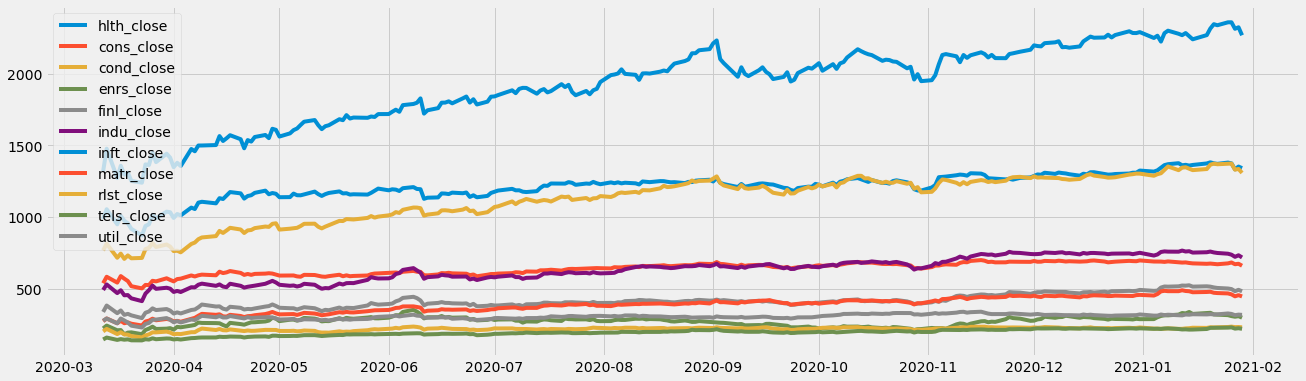

In [17]:
# This is just for reference.
plt.rcParams["figure.figsize"] = (20,6)
fig, ax = plt.subplots()
ax.plot(spx_sector_covid_data["date"], spx_sector_covid_data[["hlth_close","cons_close","cond_close","enrs_close","finl_close","indu_close","inft_close","matr_close","rlst_close","tels_close","util_close"]])
ax.legend(spx_sector_covid_data.columns[2:-2])